<a href="https://colab.research.google.com/github/toppen65/Python-Visualisation/blob/main/pythonvisualisation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

csv file /content/drive/MyDrive/Colab_Notebooks/canada.csv


<ipython-input-4-78b21b528e54>:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['total'] = df.sum(axis = 1)


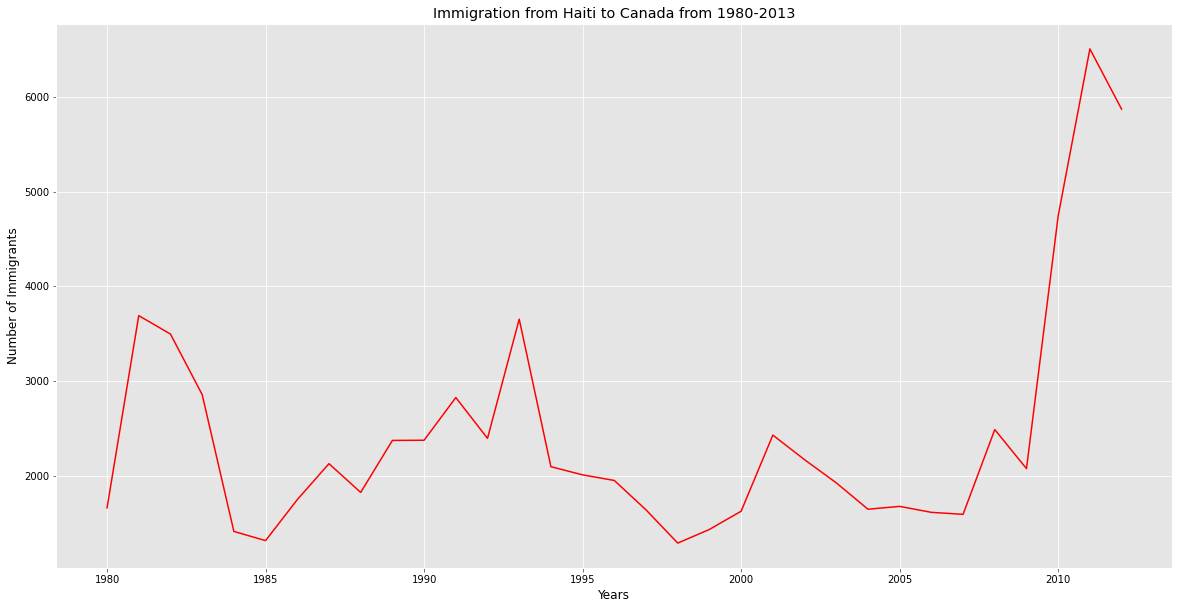

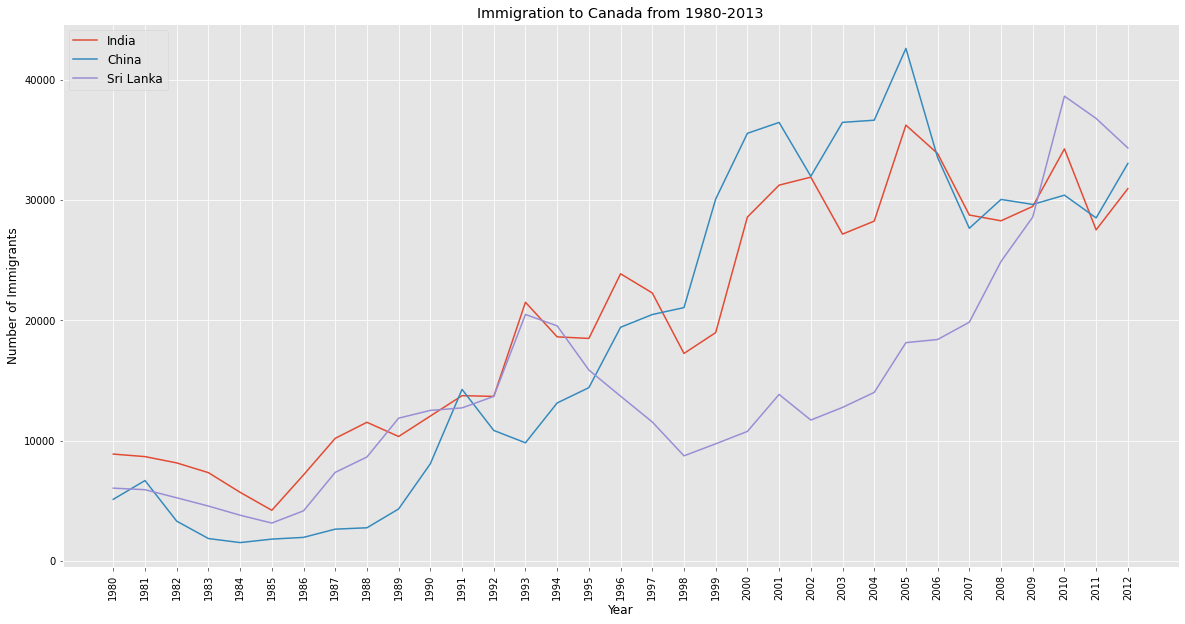

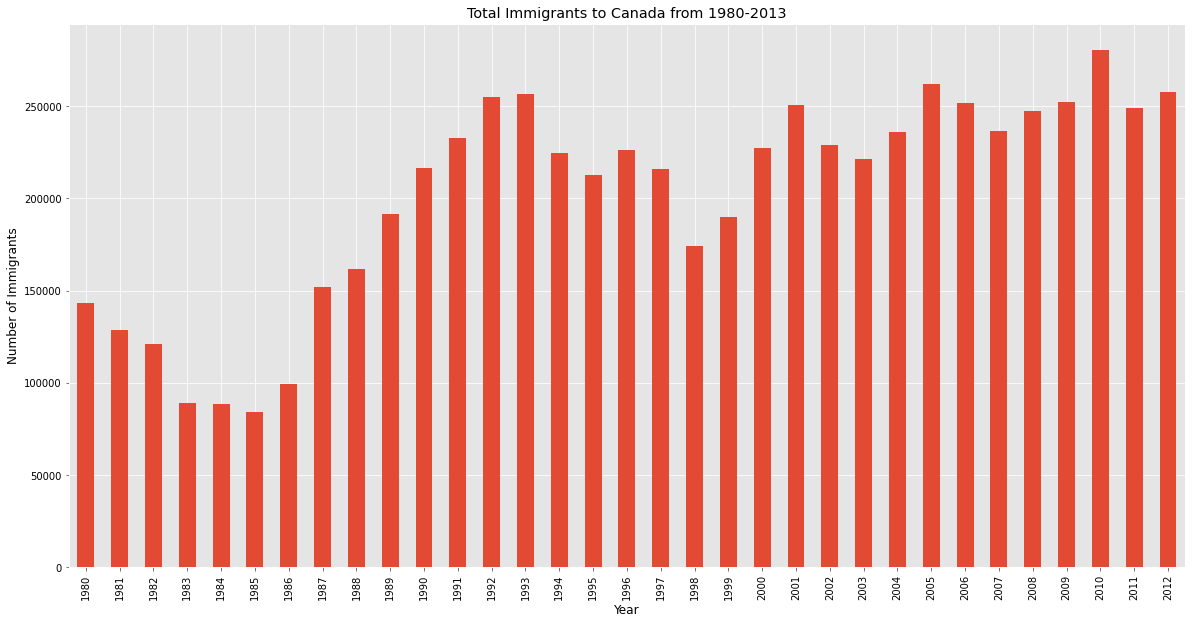

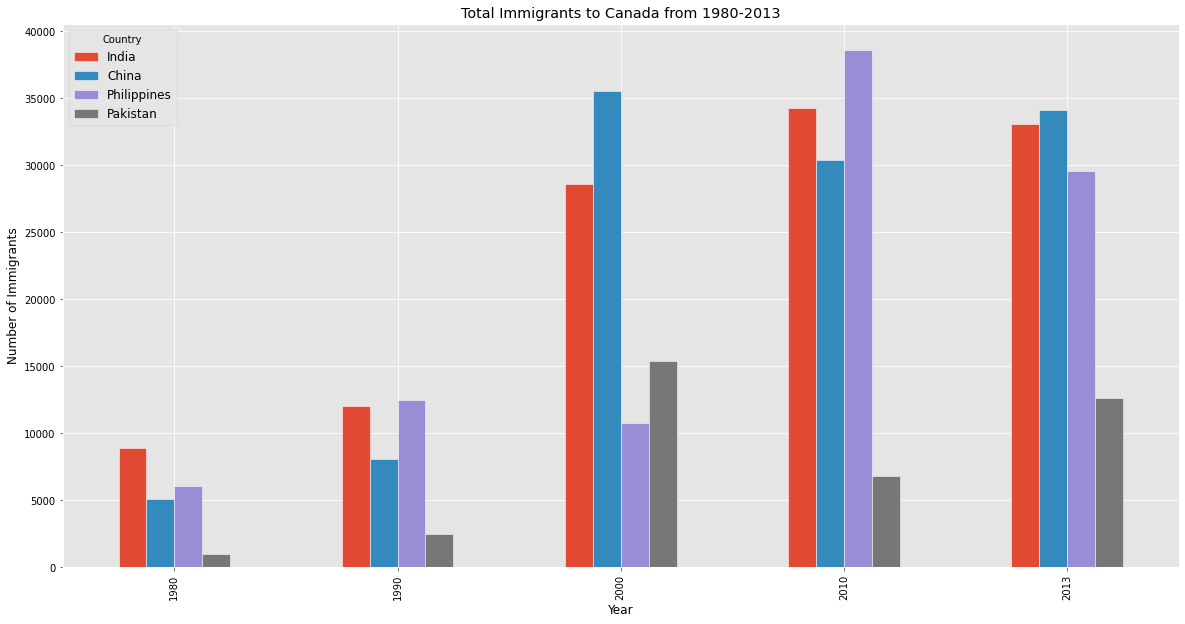

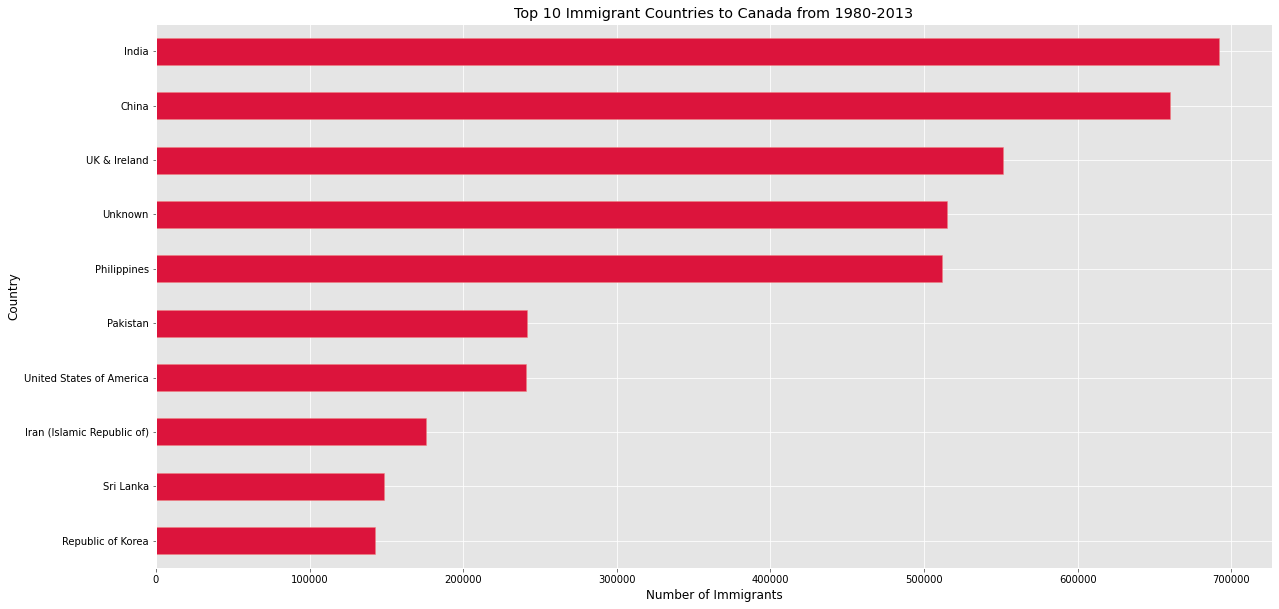

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


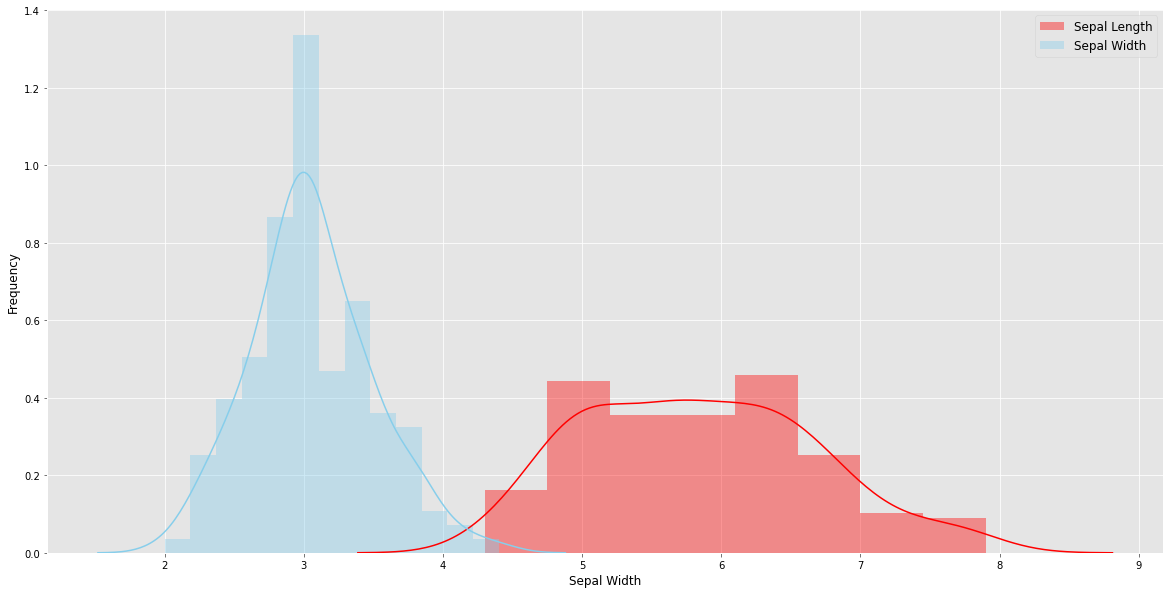

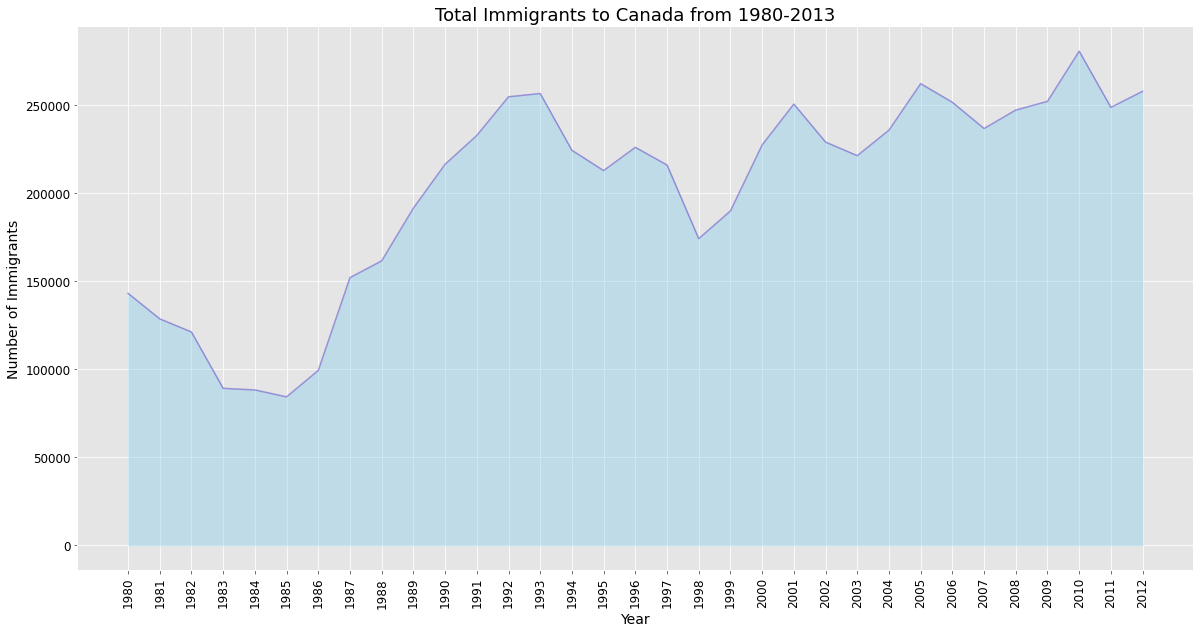

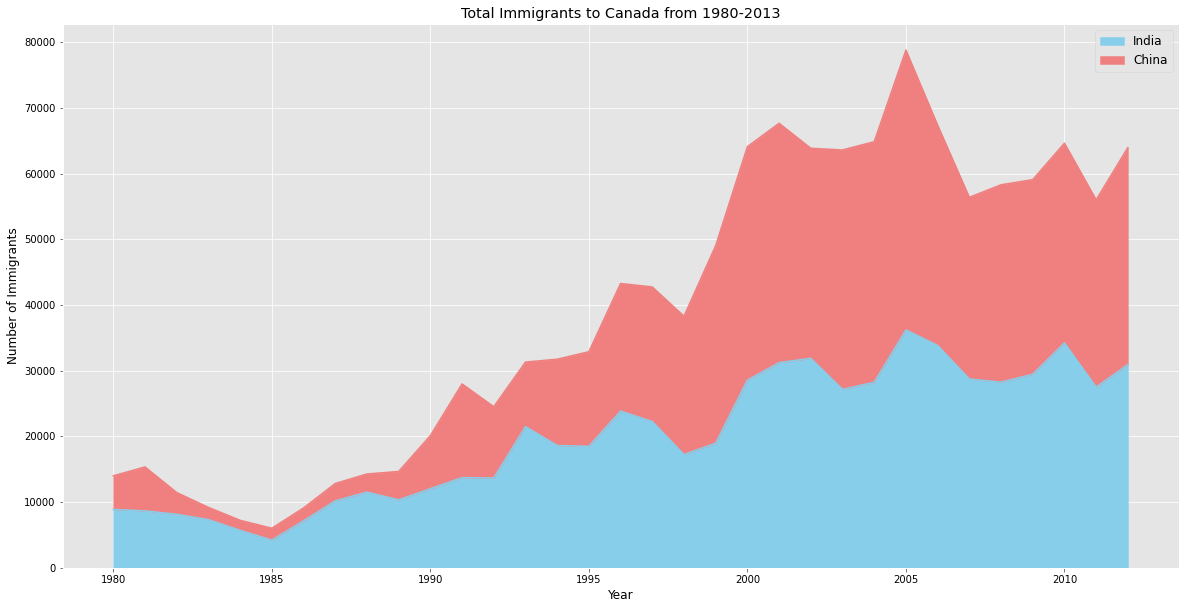

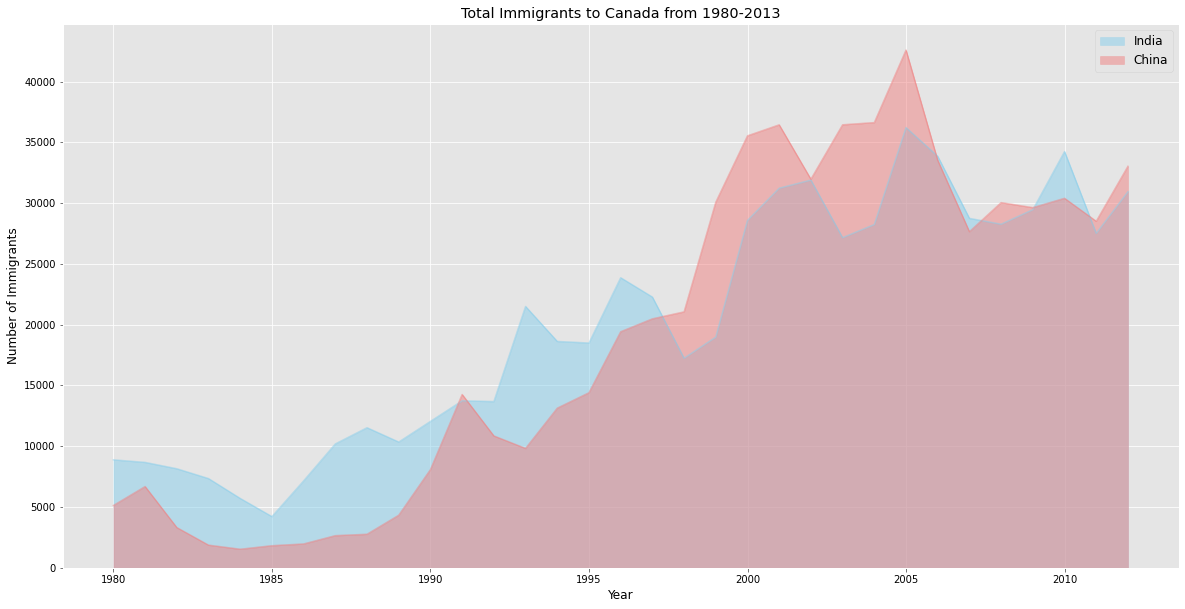

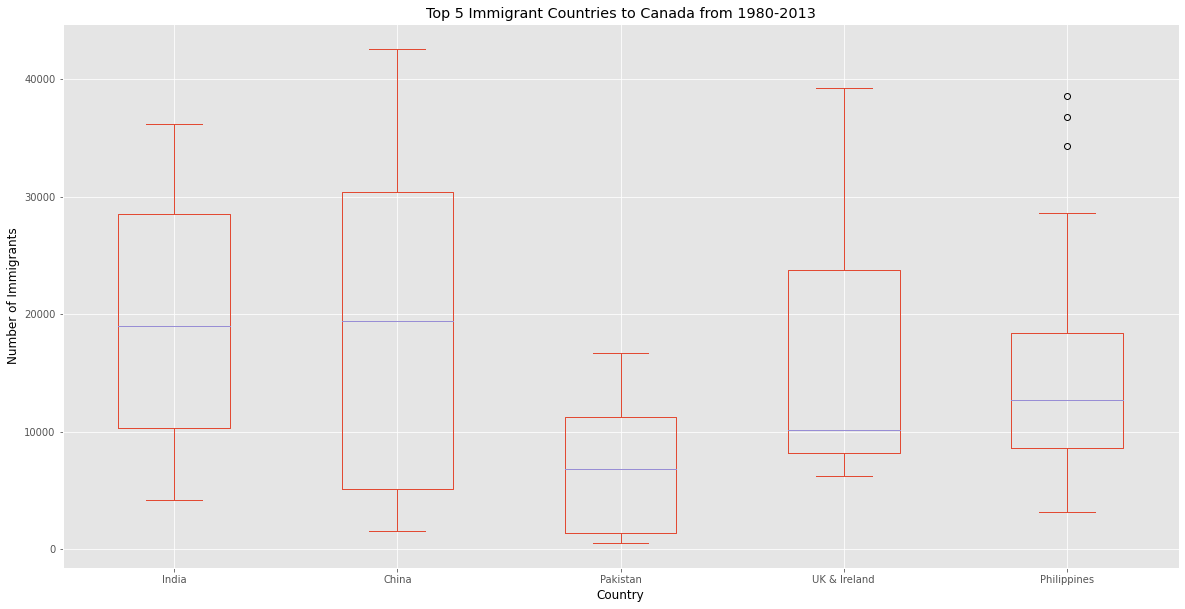

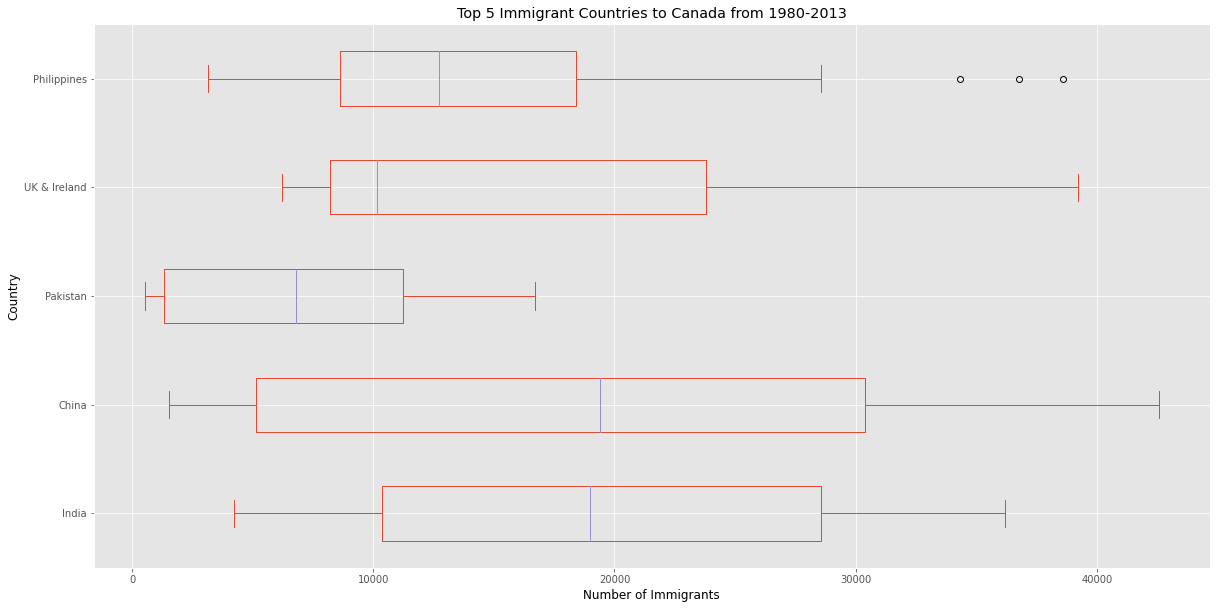

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


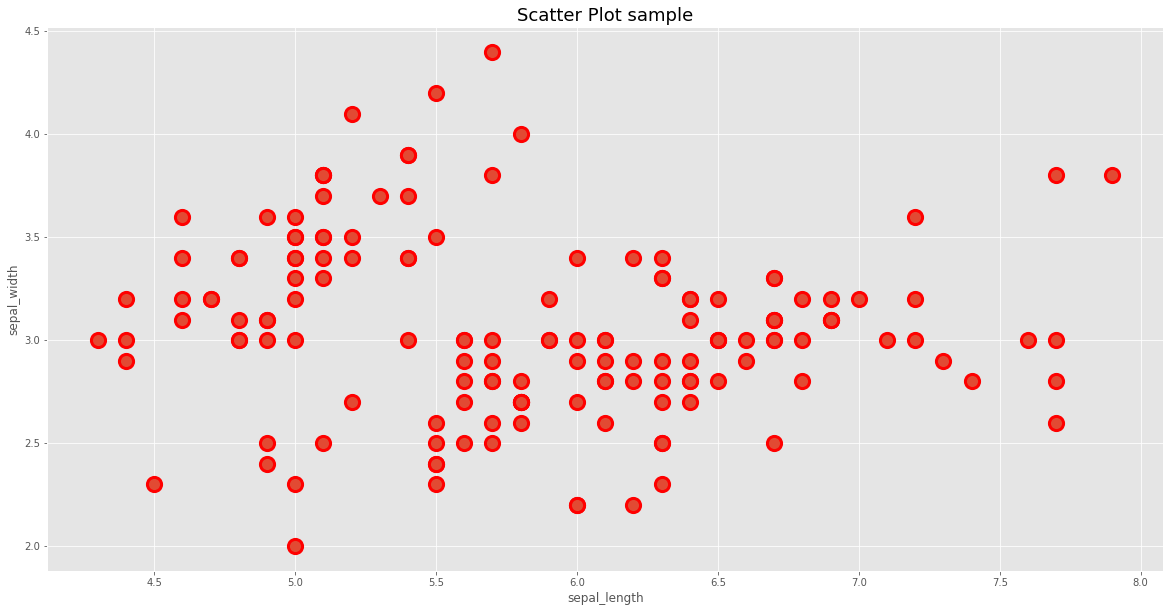

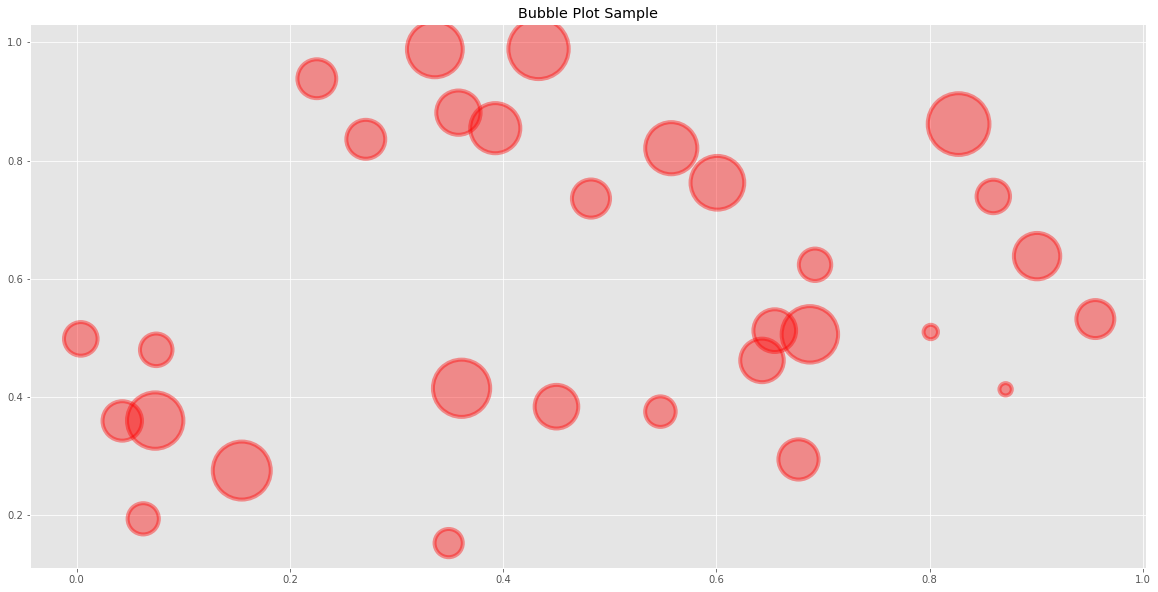

<ipython-input-4-78b21b528e54>:176: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  fig15 = plt.pie(df_pie, colors = colors, autopct = '%1.1f%%', startangle = 90,  pctdistance = 1.12,


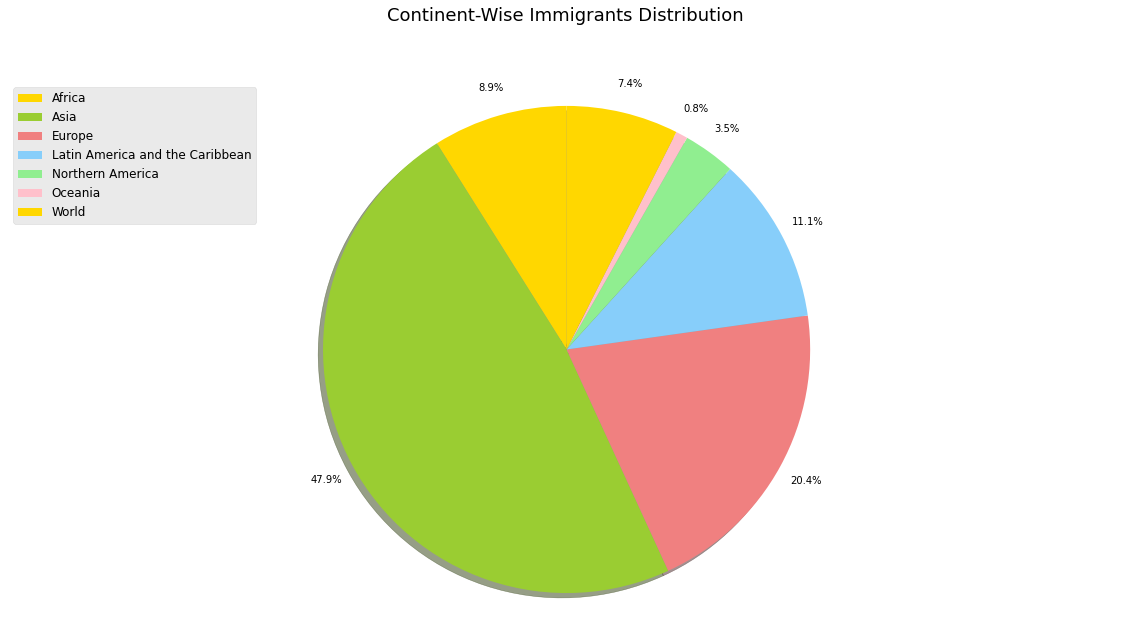

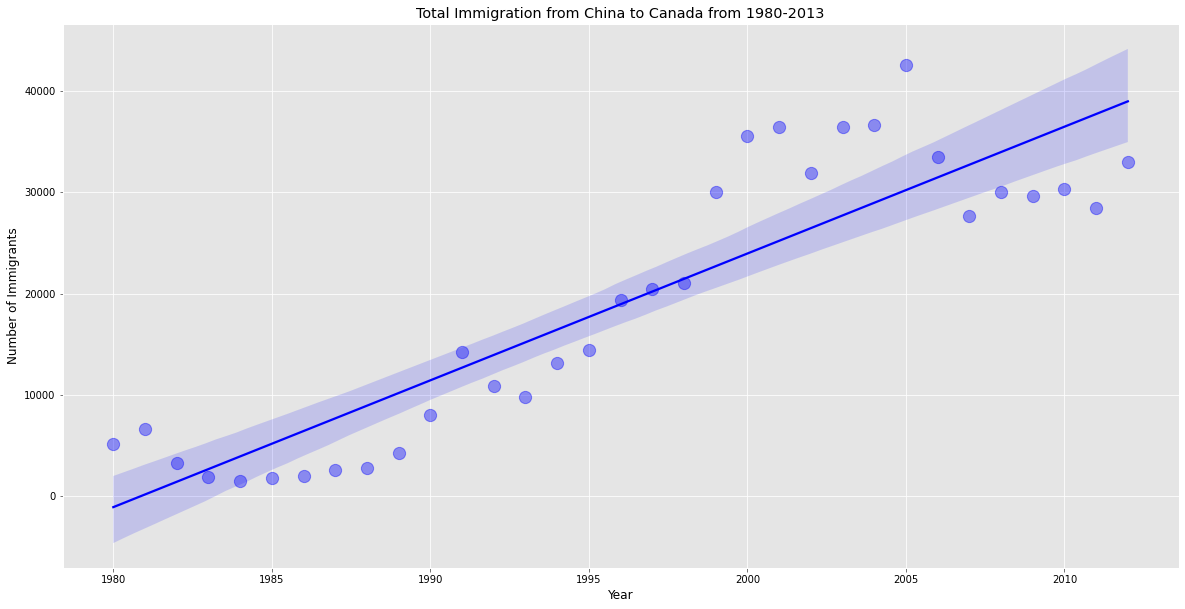

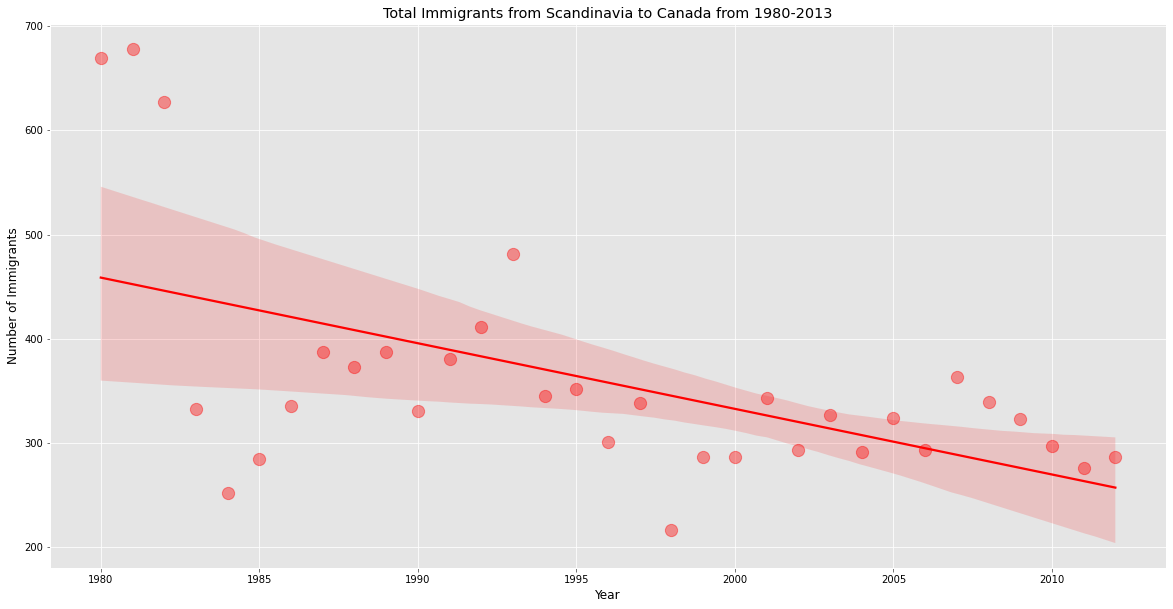

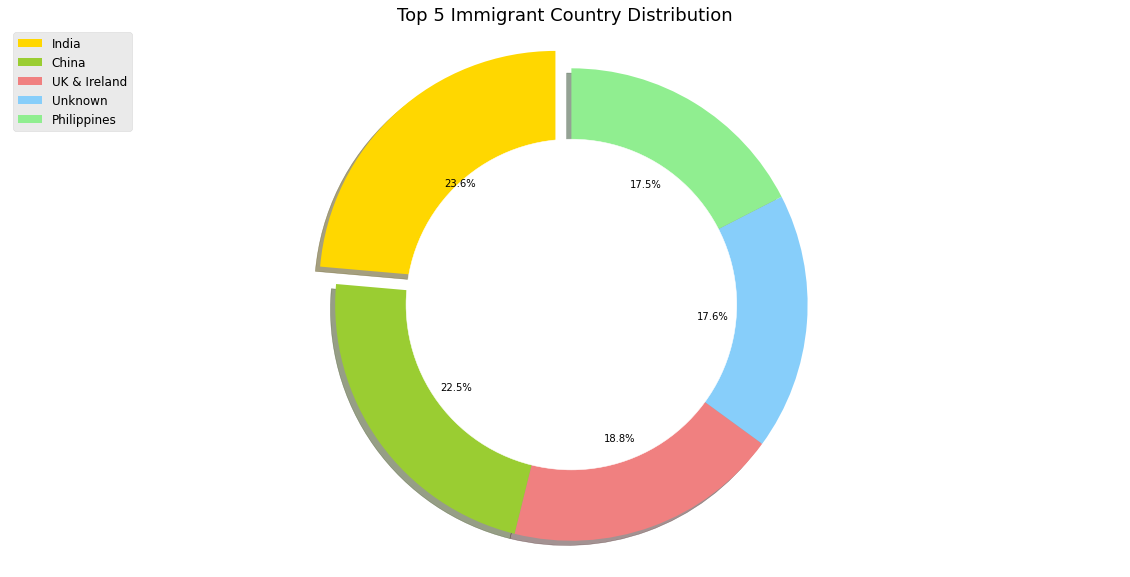

<ipython-input-4-78b21b528e54>:235: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  fig19 = plt.stem(df_tot.index, df_tot['total'])


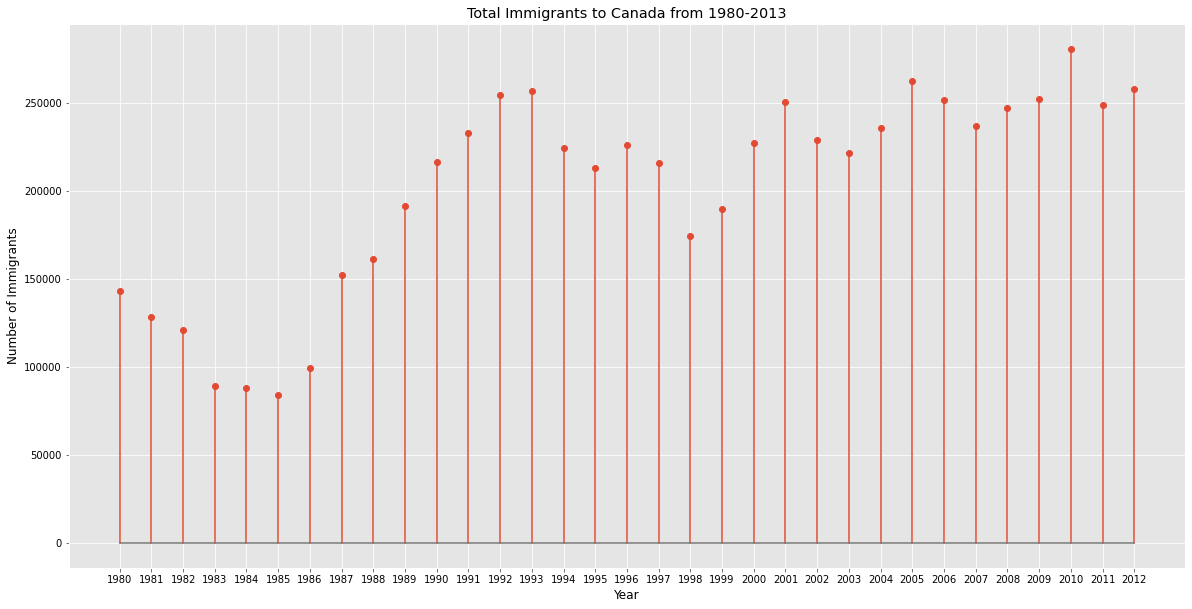

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
from pandas import read_csv
# setting style for graphs
style.use('ggplot')
# setting measurement
plt.rcParams['figure.figsize'] = (20,10)

#df = pd.read_excel('Canada.xlsx',1, skiprows = range(20), skipfooter = 2)
drivepath='/content/drive/MyDrive/Colab_Notebooks'
#csvfile='drive/My Drive/Datasets/'+'Canada.csv'
csvfile=drivepath+'/canada.csv'
print("csv file",csvfile)
df=pd.read_csv(csvfile, encoding="ISO-8859-1")

df.drop(['AREA','REG','DEV','Type','Coverage','DevName'], axis=1, inplace=True)
df.rename(columns = {'OdName':'country','AreaName':'continent','RegName':'region'}, inplace = True)
df['total'] = df.sum(axis = 1)
df = df.set_index('country')
df.rename(index = {'United Kingdom of Great Britain and Northern Ireland':'UK & Ireland'}, inplace = True)
df.columns = df.columns.astype(str)
years = list(map(str, range(1980,2013)))

# 1. Line Plot

# Single line chart
fig1 = df.loc['Haiti', years].plot(kind = 'line', color = 'r')
plt.title('Immigration from Haiti to Canada from 1980-2013',color = 'black')
plt.xlabel('Years',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('line_single.png')
plt.show()
# Multiple lines
fig2 = plt.plot(df.loc['India',years], label = 'India')
plt.plot(df.loc['China',years], label = 'China')
plt.plot(df.loc['Philippines',years], label = 'Sri Lanka')
plt.legend(loc = 'upper left', fontsize = 12)
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')
plt.title('Immigration to Canada from 1980-2013',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.savefig('line_multiple.png')
plt.show()

# 2. Bar Plot

# Vertical
df_tot = pd.DataFrame(df.loc[:,years].sum())
df_tot.rename(columns = {0:'total'}, inplace = True)
fig3 = df_tot.plot(kind = 'bar', legend = False)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.savefig('bar_vertical.png')
plt.show()
# Grouped
year_int10 = list(map(str, (1980,1990,2000,2010, 2013)))
df_group = pd.DataFrame(df.loc[['India','China','Philippines','Pakistan'],year_int10].T)
fig4 = df_group.plot.bar(edgecolor = 'white')
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(title = 'Country', fontsize = 12)
plt.savefig('bar_grouped.png')
plt.show()
# Horizontal
df_top10 = pd.DataFrame(df.nlargest(10,'total')['total'].sort_values(ascending = True))
fig5 = df_top10.plot.barh(legend = False, color = 'crimson', edgecolor = 'lightcoral')
plt.title('Top 10 Immigrant Countries to Canada from 1980-2013',color = 'black')
plt.xlabel('Number of Immigrants',color = 'black')
plt.ylabel('Country',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('bar_horizontal.png')
plt.show()

# 3. Histogram

df_iris = sb.load_dataset('iris')
fig6 = sb.distplot(df_iris['sepal_length'], color = 'Red', label = 'Sepal Length')
sb.distplot(df_iris['sepal_width'], color = 'skyblue', label = 'Sepal Width')
plt.legend(fontsize = 12)
plt.xlabel('Sepal Width', color = 'black')
plt.ylabel('Frequency', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('histogram.png')
plt.show()

# 4. Area Plots

# simple
fig7 = plt.fill_between(df_tot.index, df_tot['total'], color="skyblue", alpha=0.4)
plt.plot(df_tot.index, df_tot['total'], color = 'Slateblue', alpha = 0.6)
plt.title('Total Immigrants to Canada from 1980-2013', fontsize = 18, color = 'black')
plt.yticks(fontsize = 12, color = 'black')
plt.xticks(fontsize = 12, rotation = 90, color = 'black')
plt.xlabel('Year', fontsize = 14, color = 'black')
plt.ylabel('Number of Immigrants', fontsize = 14, color = 'black')
plt.savefig('area_simple.png')
plt.show()
# stacked
color = ['skyblue','lightcoral']
top2_list = df.nlargest(2, 'total').index.tolist()
df_top2 = pd.DataFrame(df.loc[top2_list, years].T)
fig8 = df_top2.plot(kind = 'area', stacked = True, color = color)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.legend(fontsize = 12)
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('area_stacked.png')
plt.show()
# unstacked
fig9 = df_top2.plot(kind = 'area', stacked = False, color = color)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(fontsize = 12)
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('area_unstacked.png')
plt.show()


# 5. Box Plot

# Horizontal
df_box = pd.DataFrame(df.loc[['India','China','Pakistan','UK & Ireland','Philippines'], years].T)
fig10 = df_box.plot(kind = 'box')
plt.title('Top 5 Immigrant Countries to Canada from 1980-2013', color = 'black')
plt.xlabel('Country', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.savefig('box_horizontal.png')
plt.show()
# Vertical
fig11 = df_box.plot(kind = 'box', vert = False)
plt.title('Top 5 Immigrant Countries to Canada from 1980-2013', color = 'black')
plt.ylabel('Country', color = 'black')
plt.xlabel('Number of Immigrants', color = 'black')
plt.savefig('box_vertical.png')
plt.show()

# 6. Scatter Plot
df_iris = sb.load_dataset('iris')
fig12 = sb.scatterplot('sepal_length','sepal_width', data = df_iris, s = 200, linewidth = 3, edgecolor = 'Red')
plt.title('Scatter Plot sample', color = 'black', fontsize = 18)
plt.savefig('scatter.png')
plt.show()

# 7. Bubble Plot
x = np.random.rand(1,30,1)
y = np.random.rand(1,30,1)
size = np.random.rand(1,30,1)
fig14 = plt.scatter(x,y,s = size*4000, alpha = 0.4, color = 'r', edgecolor = 'Red', linewidth = 4)
plt.title('Bubble Plot Sample', color = 'black')
plt.savefig('bubble.png')
plt.show()

# 8. Pie Chart

df_pie = pd.DataFrame(df.groupby('continent')['total'].sum().T)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode = [0,0.1,0,0,0.1,0.1]
fig15 = plt.pie(df_pie, colors = colors, autopct = '%1.1f%%', startangle = 90,  pctdistance = 1.12, 
                shadow = True)
plt.title('Continent-Wise Immigrants Distribution', color = 'black', y = 1.1, fontsize = 18)
plt.legend(df_pie.index, loc = 'upper left', fontsize = 12)
plt.axis('equal')
plt.savefig('pie.png')
plt.show()

# 9. Regression Plot

# Strong trend
df_reg = pd.DataFrame(df.loc['China',years])
df_reg.reset_index(inplace = True)
df_reg.rename(columns = {'index':'year'}, inplace = True)
df_reg[['year','China']] = df_reg[['year','China']].astype(int)
fig16 = sb.regplot(x = 'year', y = 'China', data = df_reg, color = 'b', 
                   scatter_kws = {'s':150,'alpha':0.4})
plt.title('Total Immigration from China to Canada from 1980-2013', color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('reg_strong.png')
plt.show()
# Weak trend
df_reg1 = pd.DataFrame(df.loc[['Denmark','Norway','Sweden'],years].sum())
df_reg1.reset_index(inplace = True)
df_reg1.rename(columns = {'index':'year',0:'total'}, inplace = True)
df_reg1[['year','total']] = df_reg1[['year','total']].astype(int)
fig17 = sb.regplot(x = 'year', y = 'total', data = df_reg1, color = 'Red', scatter_kws = {'s':150,'alpha':0.4})
plt.title('Total Immigrants from Scandinavia to Canada from 1980-2013', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.savefig('reg_weak.png')
plt.show()

# 10. Word Cloud



# 11. Doughnut Chart

top5_list = df.nlargest(5, 'total').index.tolist()
df_top5 = pd.DataFrame(df.loc[top5_list, 'total'].T)
circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
plt.pie(df_top5['total'], autopct = '%1.1f%%', shadow = True, explode = [0.1,0,0,0,0], colors = colors, startangle = 90)
fig20 = plt.gcf()
fig20.gca().add_artist(circle)
plt.legend(df_top5.index, fontsize = 12, loc = 'upper left')
plt.title('Top 5 Immigrant Country Distribution', color = 'black', fontsize = 18)
plt.axis('equal')
plt.savefig('doughnut.png')
plt.show()

# 12. Lollipop chart

fig19 = plt.stem(df_tot.index, df_tot['total'])
plt.title('Total Immigrants to Canada from 1980-2013', color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('lollipop.png')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
